<a href="https://colab.research.google.com/github/CppR-Repo/TT-2C2025-Data-Analitycs-Notebooks/blob/main/EntregaFinal/MiEntrega-Final/Entrega_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos con Pyhon - Pre-entrega
Nombre y apellido: Cristian Pablo Portillo Rios

# Etapa 1

## Script básico
Actividades 2 y 3

In [195]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'casablanca', 'tipo': 'latex', 'descripcion': 20, 'precio': 120000.0, 'cantidad': 2},
  {'producto': 'satinol', 'tipo': 'sintetico', 'descripcion': 4, 'precio': 75000.0, 'cantidad': 3},
  {'producto': 'andina', 'tipo': 'fijador', 'descripcion': 1, 'precio': 7800.0, 'cantidad': 2},
  {'producto': 'comodin', 'tipo': 'enduido', 'descripcion': 10, 'precio': 20500.0, 'cantidad': 1},
  {'producto': 'aa', 'tipo': 'lija', 'descripcion': 100, 'precio': 2100.0, 'cantidad': 10}
]

In [196]:
# Calculamos las ventas acumuladas - map
# 1. Calcula la venta de cada producto con map
ventas_individuales = map(lambda x:x['precio'] * x['cantidad'], ventas)

# 2. Sumar todas las ventas individuales con sum
ventas_acumuladas = sum(ventas_individuales)
print(f"Las ventas acumuladas son: {ventas_acumuladas}")

Las ventas acumuladas son: 522100.0


In [197]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum([venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

522100.0

## Import Datasets
Actividad 1

In [198]:
import pandas as pd

In [199]:
# Import dataset ventas
df_ventas = pd.read_csv("https://raw.githubusercontent.com/CppR-Repo/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/ventas.csv")

In [200]:
# Import dataset clientes
df_clientes = pd.read_csv("https://raw.githubusercontent.com/CppR-Repo/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/clientes.csv")

In [201]:
# Import dataset marketing
df_marketing = pd.read_csv("https://raw.githubusercontent.com/CppR-Repo/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/marketing.csv")

In [202]:
df_ventas

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
...,...,...,...,...,...,...
3030,1837,Horno eléctrico,$104.12,9.0,30/12/2024,Electrodomésticos
3031,2276,Laptop,$85.27,9.0,30/12/2024,Electrónica
3032,2696,Laptop,$107.81,4.0,30/12/2024,Electrónica
3033,2913,Smartphone,$99.85,7.0,30/12/2024,Electrónica


## Dataframe ventas

### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [203]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [204]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [205]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
2346,2725,Auriculares,$107.61,1.0,03/10/2024,Electrónica
2705,119,Lámpara de mesa,$50.60,11.0,20/11/2024,Decoración
1446,810,Adorno de pared,$105.57,7.0,11/06/2024,Decoración
2534,2107,Cámara digital,$64.14,3.0,29/10/2024,Electrónica
2981,2905,Auriculares,$40.58,2.0,23/12/2024,Electrónica


In [206]:
# Analizamos el campo precio
# Si es numericos se puede aplicar describe()
df_ventas["precio"].sample(5)

,precio
1179,$94.79
994,$36.36
256,$115.20
1794,$97.56
198,$40.63


In [207]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
2804,5.0
994,7.0
2041,1.0
1727,12.0
649,7.0


In [208]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"].sample(5)

,fecha_venta
941,14/04/2024
1391,03/06/2024
2891,13/12/2024
930,13/04/2024
1481,15/06/2024


In [209]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


### Calidad de datos
Actividad 5

In [210]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [211]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep='first')]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
826,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
827,421,Lámpara de mesa,$114.83,9.0,05/04/2024,Decoración
828,424,Jarrón decorativo,$87.94,2.0,05/04/2024,Decoración
829,1868,Cafetera,$62.23,1.0,05/04/2024,Electrodomésticos
830,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
844,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
845,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
846,439,Lámpara de mesa,$35.43,2.0,06/04/2024,Decoración
847,906,Cortinas,$84.04,3.0,06/04/2024,Decoración


In [212]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [213]:
# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [214]:
# Analizar los precios de los NaN a ver que opciones tenemos
# df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
df_ventas["producto"].value_counts()
# Unique nos devuelve una lista de los valores unicos.
# df_ventas["producto"].unique()


,count
producto,
Lámpara de mesa,181
Auriculares,147
Microondas,135
Cafetera,118
Laptop,104
Secadora,103
Jarrón decorativo,102
Smartphone,102
Alfombra,102


### Observaciones




* Cantidad de registros: 3035
* Columnas 6
* 35 duplicados, eliminarlos
* Algunos nulos (2), 1% del faltante, dropna
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64
* Campos cantidad: cambiar dtype a int64
* Campo fecha: ajustar a dtype datetime

## Dataframe marketing

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [215]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [216]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [217]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
24,4.19
5,5.07
84,5.82
67,4.69
26,4.37


In [218]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
80,16/11/2024
57,28/08/2024
58,08/09/2024
0,20/03/2024
29,24/06/2024


In [219]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
57,17/10/2024
34,03/09/2024
48,11/10/2024
24,22/07/2024
73,9/12/2024


### Calidad de los datos


In [220]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

### Observaciones
* Cantidad de registro: 90
* Columnas: 6
* Duplicado: 0
* Fecha inicio y fin: Cambiar a dtype datetime

## Dataframe clientes

In [221]:
# Aplicamos info()
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [222]:
# Visualizamos con head()
df_clientes.head()

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [223]:
# Estadistica descriptiva
df_clientes.describe()

,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


In [224]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

### Analisis exploratorio de datos

### Observaciones
* Cantidad de registros: 567
* Columnas: 5
* Duplicado: 0

# Etapa 2

## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Cantidad de registros: 2998
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo cantidad: Cambiar el dtype a int64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

Normalizar nombres de columnas

In [225]:
df_ventas.columns = [c.strip().lower() for c in df_ventas.columns]
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')

In [226]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [227]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [228]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [229]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [230]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [231]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
1197,119.18
1203,116.90
974,91.25


In [232]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)

In [233]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [234]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes

dtype('int64')

In [235]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [236]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 164.0+ KB


### Dataframe marketing

* Cantidad de registro: 90
* Fecha inicio: Cambiar a dtype datetime - Ok
* Fecha fin: Cambiar a dtype datetime - Ok

Normalizar nombres de columnas

In [237]:
df_marketing.columns = [c.strip().lower() for c in df_marketing.columns]
df_marketing.columns

Index(['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio',
       'fecha_fin'],
      dtype='object')

In [238]:
df_marketing['costo'] = df_marketing['costo'].astype(float)
df_marketing['costo'].dtype
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [239]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [240]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [241]:
# Validamos los cambios
df_marketing['fecha_inicio'].dtype
df_marketing['fecha_fin'].dtype


dtype('<M8[ns]')

In [242]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


## Transformación de datos
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [243]:
df_ventas.head(4)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos


In [244]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad
# Agregamos una nueva columnas
df_ventas["valor_venta"] = df_ventas["precio"] * df_ventas["cantidad"]

In [245]:
# Visualizamos
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [246]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [247]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


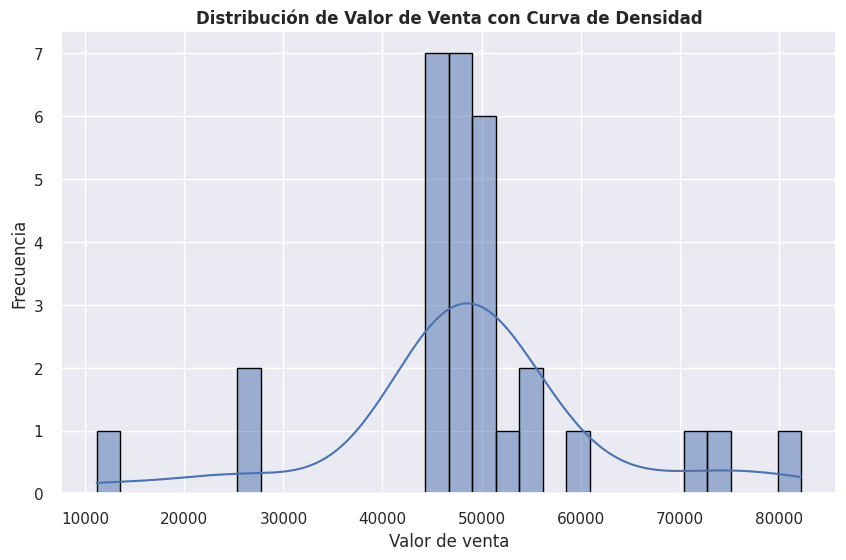

In [248]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

In [249]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [250]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

,producto,valor_venta
3,Auriculares,74175.58
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
16,Jarrón decorativo,51130.88
19,Lámpara de mesa,82276.38
20,Microondas,72562.89
25,Secadora,52115.45
27,Smartphone,54132.44


# Analizamos el impacto de la campaña

## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [251]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [252]:
# Agrupamos por categoria y agregamos la suma
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [253]:
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [254]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


### Unimos los dataframes ventas con marketing

In [255]:
# Unir los datasets ventas y marketing por columna 'producto'
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")
print("Cantidad de registros: ", len(ventas_marketing))

Cantidad de registros:  8994


In [256]:
# Verificar coincidencias (muestra)
ventas_marketing.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29


In [257]:
# Ordenamos por producto
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
4602,10,Adorno de pared,446.50,TV,4.81,2024-06-29,2024-03-20,2024-05-03
4603,10,Adorno de pared,446.50,Email,5.08,2024-06-29,2024-04-13,2024-05-10
4604,10,Adorno de pared,446.50,RRSS,4.16,2024-06-29,2024-10-22,2024-12-21
303,20,Adorno de pared,180.42,TV,4.81,2024-01-14,2024-03-20,2024-05-03
304,20,Adorno de pared,180.42,Email,5.08,2024-01-14,2024-04-13,2024-05-10
305,20,Adorno de pared,180.42,RRSS,4.16,2024-01-14,2024-10-22,2024-12-21


In [258]:
# Visualizamos algunos registros, pero ordenamos por fecha_venta
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["valor_venta"], ascending=False).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
1646,2063,Smartphone,1488.12,TV,4.78,2024-03-05,2024-09-28,2024-10-24
1644,2063,Smartphone,1488.12,RRSS,6.37,2024-03-05,2024-03-29,2024-05-16
1645,2063,Smartphone,1488.12,Email,4.65,2024-03-05,2024-05-28,2024-06-15
2625,1109,Batidora,1485.96,Email,4.48,2024-04-11,2024-04-10,2024-06-08
2627,1109,Batidora,1485.96,RRSS,4.52,2024-04-11,2024-11-01,2024-12-08
2626,1109,Batidora,1485.96,TV,6.28,2024-04-11,2024-08-27,2024-10-11


Luego del merge encontramos:

* Aparecen ventas duplicadas, por ejemplo los primeros 3 registros con id_venta 2063, dado que ese producto tuvo 3 campañas de marketing, pero para este caso fue vendido fuera del período de marketing.
* Y ver el caso de los últimos 3 registros con id_venta 1109, dos de ellos dentro y uno fuera del período

Por ello, vamos a generar dos nuevos dataframes, uno con aquellas ventas dentro del período de marketing, y otro fuera del período

### Ventas dentro de la campaña

In [259]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
filtro_ventas_marketing = ventas_marketing[(ventas_marketing["fecha_venta"] >= ventas_marketing["fecha_inicio"]) & (ventas_marketing["fecha_venta"] <= ventas_marketing["fecha_fin"])]
print("Cantidad de registros dentro de la campaña: ", len(filtro_ventas_marketing))

Cantidad de registros dentro de la campaña:  847


In [260]:
# Visualicemos algunos de los registros de ventas durante la campaña de marketing
filtro_ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(10)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
7937,70,Adorno de pared,1265.04,RRSS,4.16,2024-11-18,2024-10-22,2024-12-21
3195,100,Adorno de pared,897.28,TV,4.81,2024-05-02,2024-03-20,2024-05-03
3196,100,Adorno de pared,897.28,Email,5.08,2024-05-02,2024-04-13,2024-05-10
8450,130,Adorno de pared,206.10,RRSS,4.16,2024-12-08,2024-10-22,2024-12-21
7508,190,Adorno de pared,360.80,RRSS,4.16,2024-10-30,2024-10-22,2024-12-21
2160,210,Adorno de pared,286.68,TV,4.81,2024-03-24,2024-03-20,2024-05-03
3237,220,Adorno de pared,498.24,TV,4.81,2024-05-03,2024-03-20,2024-05-03
3238,220,Adorno de pared,498.24,Email,5.08,2024-05-03,2024-04-13,2024-05-10
2124,270,Adorno de pared,579.54,TV,4.81,2024-03-22,2024-03-20,2024-05-03
2475,300,Adorno de pared,609.75,TV,4.81,2024-04-06,2024-03-20,2024-05-03


In [261]:
# Como vemos algunos duplicados, listemos solo esos
duplicados_ventas_marketing = filtro_ventas_marketing[filtro_ventas_marketing.duplicated(subset="id_venta",keep=False)]
duplicados_ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
3195,100,Adorno de pared,897.28,TV,4.81,2024-05-02,2024-03-20,2024-05-03
3196,100,Adorno de pared,897.28,Email,5.08,2024-05-02,2024-04-13,2024-05-10
3237,220,Adorno de pared,498.24,TV,4.81,2024-05-03,2024-03-20,2024-05-03
3238,220,Adorno de pared,498.24,Email,5.08,2024-05-03,2024-04-13,2024-05-10
2985,320,Adorno de pared,224.28,TV,4.81,2024-04-25,2024-03-20,2024-05-03
2986,320,Adorno de pared,224.28,Email,5.08,2024-04-25,2024-04-13,2024-05-10


Los registros con id_venta duplicados nos impiden agrupar directamente por producto, debemos antes agrupar por [id_venta, producto] quedarnos con el primer valor_venta y hacer la suma de los costos de marketing.
<BR>
Luego si agrupamos por producto, para saber el monto total de venta para cada uno.

In [262]:
# Venta unica (sin duplicados por canal)
ventas_unicas = filtro_ventas_marketing.drop_duplicates(subset=['id_venta'])
ventas_unicas[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(29)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
7937,70,Adorno de pared,1265.04,RRSS,4.16,2024-11-18,2024-10-22,2024-12-21
3195,100,Adorno de pared,897.28,TV,4.81,2024-05-02,2024-03-20,2024-05-03
8450,130,Adorno de pared,206.10,RRSS,4.16,2024-12-08,2024-10-22,2024-12-21
7508,190,Adorno de pared,360.80,RRSS,4.16,2024-10-30,2024-10-22,2024-12-21
2160,210,Adorno de pared,286.68,TV,4.81,2024-03-24,2024-03-20,2024-05-03
3237,220,Adorno de pared,498.24,TV,4.81,2024-05-03,2024-03-20,2024-05-03
2124,270,Adorno de pared,579.54,TV,4.81,2024-03-22,2024-03-20,2024-05-03
2475,300,Adorno de pared,609.75,TV,4.81,2024-04-06,2024-03-20,2024-05-03
2985,320,Adorno de pared,224.28,TV,4.81,2024-04-25,2024-03-20,2024-05-03
2433,340,Adorno de pared,98.60,TV,4.81,2024-04-04,2024-03-20,2024-05-03


In [263]:
print("Cantidad de registros con id_venta únicos: ", len(ventas_unicas))

Cantidad de registros con id_venta únicos:  768


In [264]:
# Total de venta por producto
ventas_por_producto = ventas_unicas.groupby('producto')['valor_venta'].sum().reset_index()
ventas_por_producto.head()

,producto,valor_venta
0,Adorno de pared,15037.90
1,Alfombra,15137.77
2,Aspiradora,12844.78
3,Auriculares,18181.01
4,Batidora,23460.35


In [265]:
# Suma de los costos de canales de ese producto
costos_por_producto = (filtro_ventas_marketing.groupby('producto', as_index=False).agg(costo_total=('costo', 'sum')))
costos_por_producto.head()

,producto,costo_total
0,Adorno de pared,143.58
1,Alfombra,185.78
2,Aspiradora,163.92
3,Auriculares,212.75
4,Batidora,227.32


In [266]:
resultado_final = ventas_por_producto.merge(costos_por_producto, on='producto', how='left')

In [267]:
# GANANCIA REAL
# Agregamos otra columna con la ganancia
resultado_final['ganancia'] = resultado_final['valor_venta'] - resultado_final['costo_total']
resultado_final.head()

,producto,valor_venta,costo_total,ganancia
0,Adorno de pared,15037.90,143.58,14894.32
1,Alfombra,15137.77,185.78,14951.99
2,Aspiradora,12844.78,163.92,12680.86
3,Auriculares,18181.01,212.75,17968.26
4,Batidora,23460.35,227.32,23233.03


### Ventas fuera de la campaña de marketing

In [268]:
# filtramos solo aquellos productos que se hayan vendido fuera de la campaña
ventas_sin_marketing = ventas_marketing.query("(fecha_venta < fecha_inicio) | (fecha_venta > fecha_fin)")
print("Cantidad de registros fuera de la campaña: ", len(ventas_sin_marketing))

Cantidad de registros fuera de la campaña:  8147


In [269]:
ventas_sin_marketing[["id_venta","producto", "valor_venta", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["id_venta","producto"], ascending=True).head(6)

,id_venta,producto,valor_venta,fecha_venta,fecha_inicio,fecha_fin
2794,1,Lámpara de mesa,658.00,2024-04-17,2024-05-30,2024-06-29
2795,1,Lámpara de mesa,658.00,2024-04-17,2024-08-26,2024-10-07
1458,2,Cuadro decorativo,318.36,2024-02-27,2024-04-27,2024-06-04
1459,2,Cuadro decorativo,318.36,2024-02-27,2024-08-15,2024-09-12
1460,2,Cuadro decorativo,318.36,2024-02-27,2024-11-05,2024-12-23
6630,3,Espejo decorativo,51.32,2024-09-22,2024-05-31,2024-07-08


In [270]:
# Aquí también hay id_venta duplicados, así que procedemos igual que antes, agrupando primero por id_venta y producto
# y luego solo por producto
ventas_sin_marketing_agg1 = ventas_sin_marketing.groupby(["id_venta", "producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first")
)
print(len(ventas_sin_marketing_agg1))

ventas_sin_marketing_agg2 = ventas_sin_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_sm=("valor_venta", "sum")
)

# Ordenamos y guardamos en el dataframe final
ventas_sin_marketing_final = ventas_sin_marketing_agg2[["producto", "ventas_producto_sm"]].sort_values(by=["ventas_producto_sm"], ascending=False)

2998


In [271]:
ventas_sin_marketing_final.head(5)

,producto,ventas_producto_sm
19,Lámpara de mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60


### Graficamos ventas y costos de marketing apilado

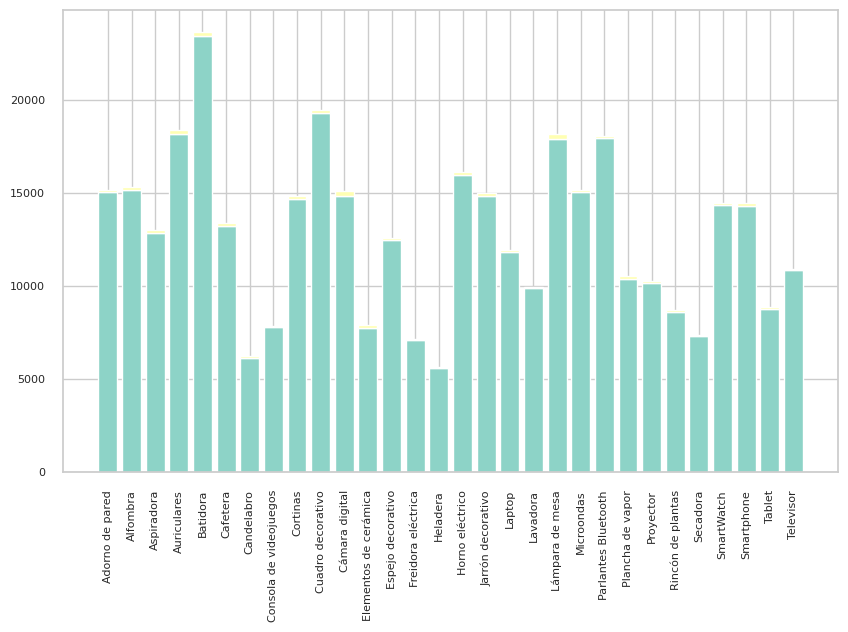

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto

# Estilos
sns.set_theme(
    style="whitegrid",
    palette="Set3",
    context="notebook")
plt.figure(figsize=(10,6))

# Primer nivel (abajo)
plt.bar(resultado_final["producto"], resultado_final["valor_venta"], label="Ventas")

# Segundo nivel (arriba)
plt.bar(resultado_final["producto"], resultado_final["costo_total"],bottom=resultado_final["valor_venta"],label="Costo Marketing")


plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Entrega Final

Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe

En la Etapa 2 - Limpieza de datos, obtuvimos los dataframes:

df_ventas
df_marketing
Usamos el método describe para obtener un resumen de las:

Medidas de posición
Medidas de dispersión o variabilidad

In [273]:
# Dataframe ventas
df_ventas[["precio", "cantidad", "valor_venta"]].describe()
# df_ventas.describe()

,precio,cantidad,valor_venta
count,2998.000000,2998.000000,2998.000000
mean,75.291318,6.502668,489.357412
std,28.736008,3.455107,334.281817
min,26.000000,1.000000,26.300000
25%,50.030000,3.000000,220.920000
50%,75.205000,7.000000,418.065000
75%,100.067500,9.000000,709.920000
max,124.970000,12.000000,1488.120000


In [274]:
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [275]:
# Dataframe marketing
df_marketing.groupby("canal")["costo"].describe()

,count,mean,std,min,25%,50%,75%,max
canal,,,,,,,,
Email,30.0,4.840000,0.898773,2.95,4.2125,4.895,5.5075,6.84
RRSS,30.0,5.030333,0.894101,3.16,4.5600,5.130,5.5425,7.16
TV,30.0,4.915667,1.063215,3.06,4.3725,4.795,5.5400,7.39


## 2 - EDA (Análisis Exploratorio de Datos)

Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

### Gráficos histogramas

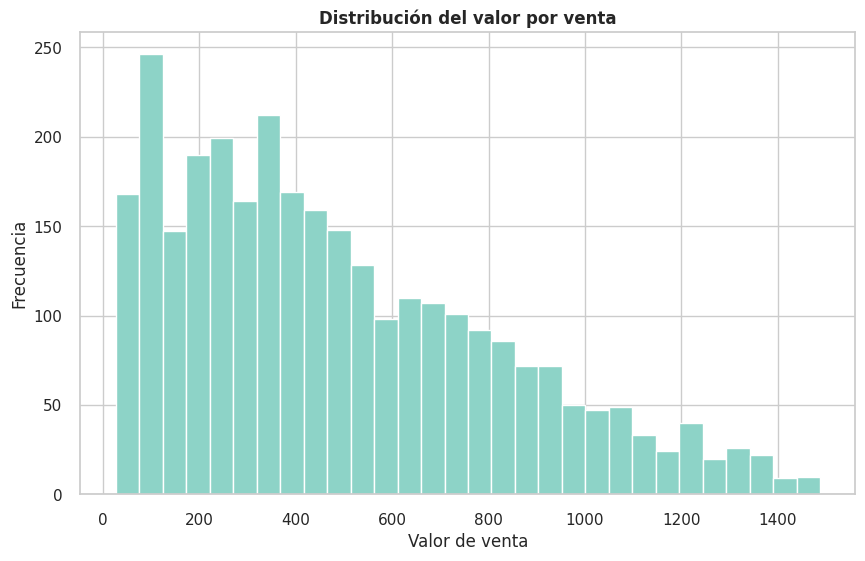

In [276]:
# Histograma del valor de venta
# Grafica
plt.hist(df_ventas['valor_venta'], bins=30)

# Títulos y leyendas
plt.title("Distribución del valor por venta")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

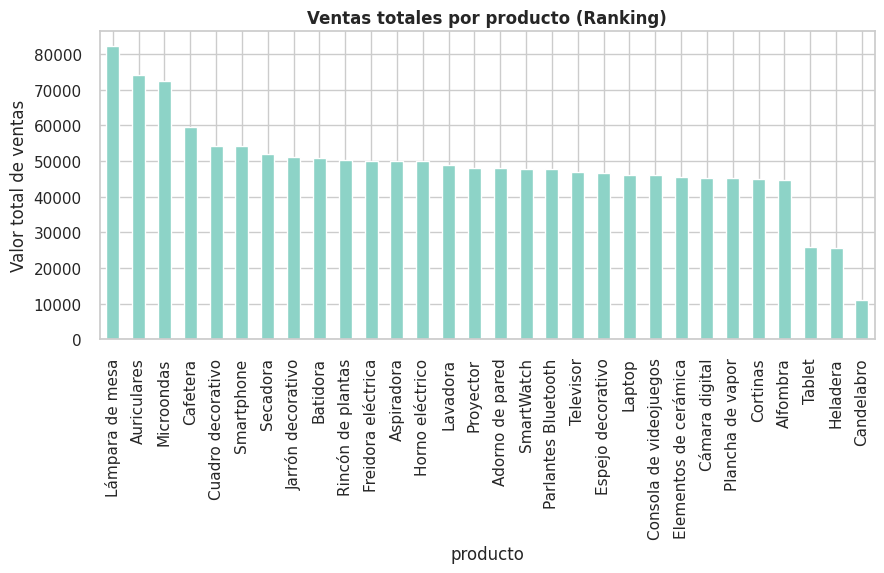

In [277]:
# Histograma venta por producto
# Esto muestra que producto vende mas.
ventas_por_producto = df_ventas.groupby('producto')['valor_venta'].sum().sort_values(ascending=False)

# Grafica
ventas_por_producto.plot(kind='bar', figsize=(10,4))

# Títulos y leyendas
plt.title("Ventas totales por producto (Ranking)")
plt.ylabel("Valor total de ventas")
plt.show()

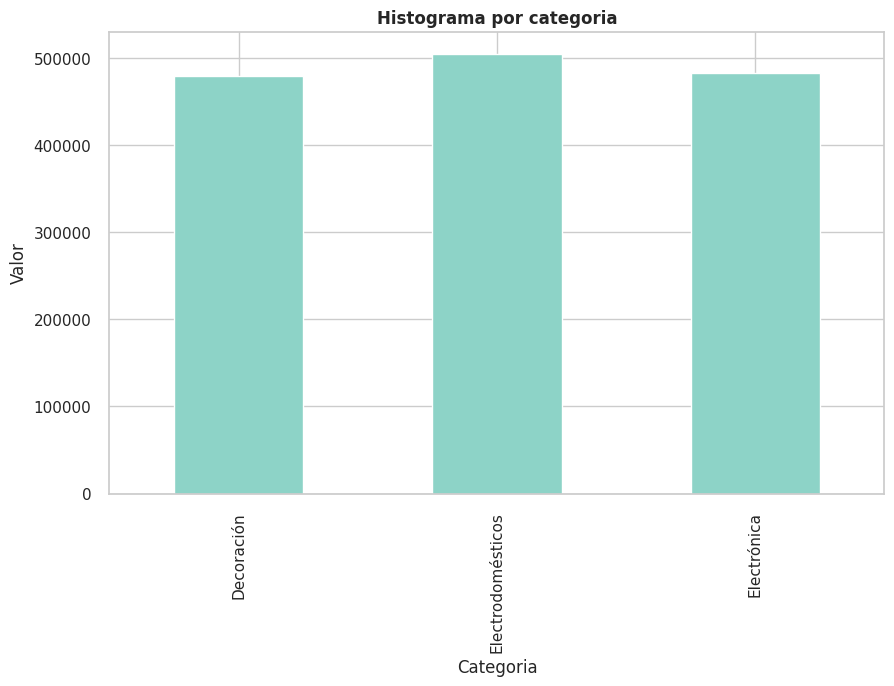

In [278]:
# Histograma por categoria
ventas_categoria = df_ventas.groupby('categoria')['valor_venta'].sum()

# Grafica
ventas_categoria.plot(kind='bar')

# Títulos y leyendas
plt.title("Histograma por categoria")
plt.xlabel("Categoria")
plt.ylabel("Valor")
plt.show()


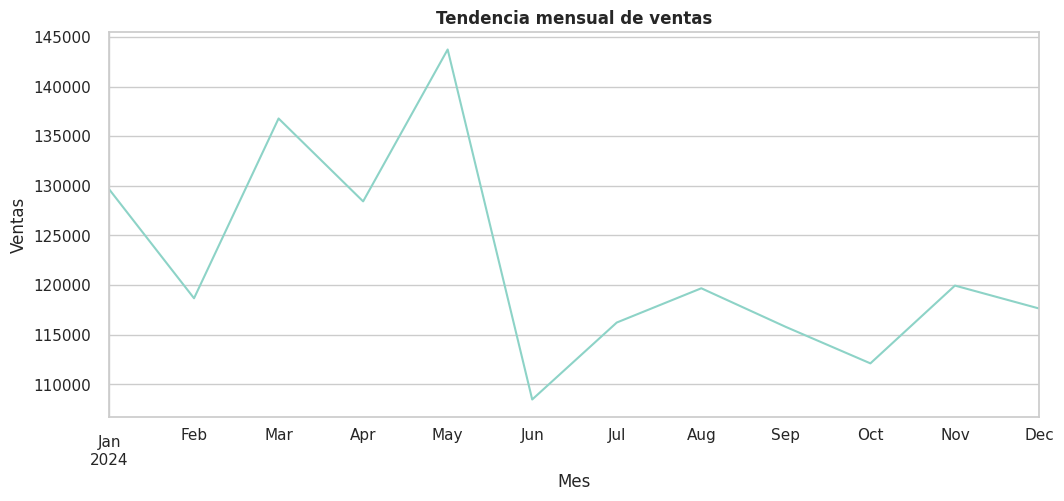

In [279]:
# Histograma tendencia temporal de ventas
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'])

ventas_mensuales = df_ventas.set_index('fecha_venta').resample('ME')['valor_venta'].sum()

# Grafico
ventas_mensuales.plot(figsize=(12,5))

# Título y leyendas
plt.title("Tendencia mensual de ventas")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.show()

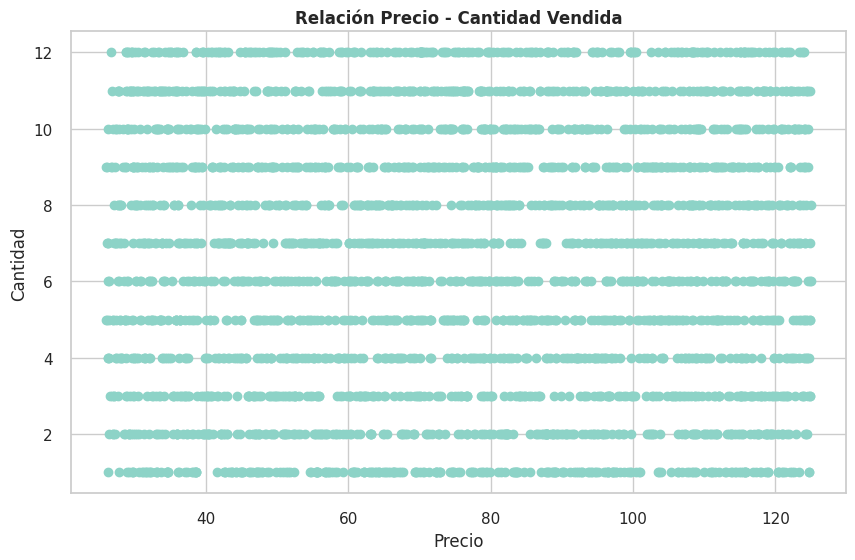

In [280]:
# Histograma entre precio y cantidad vendida

# Grafica
plt.scatter(df_ventas['precio'], df_ventas['cantidad'])

# Título y leyendas
plt.title("Relación Precio - Cantidad Vendida")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.show()

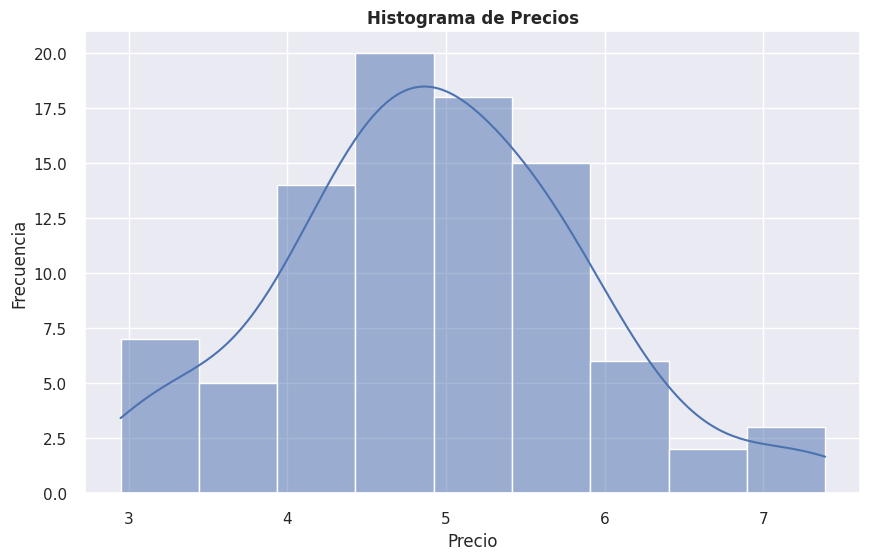

In [281]:
# Histograma costo marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_marketing, x="costo", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

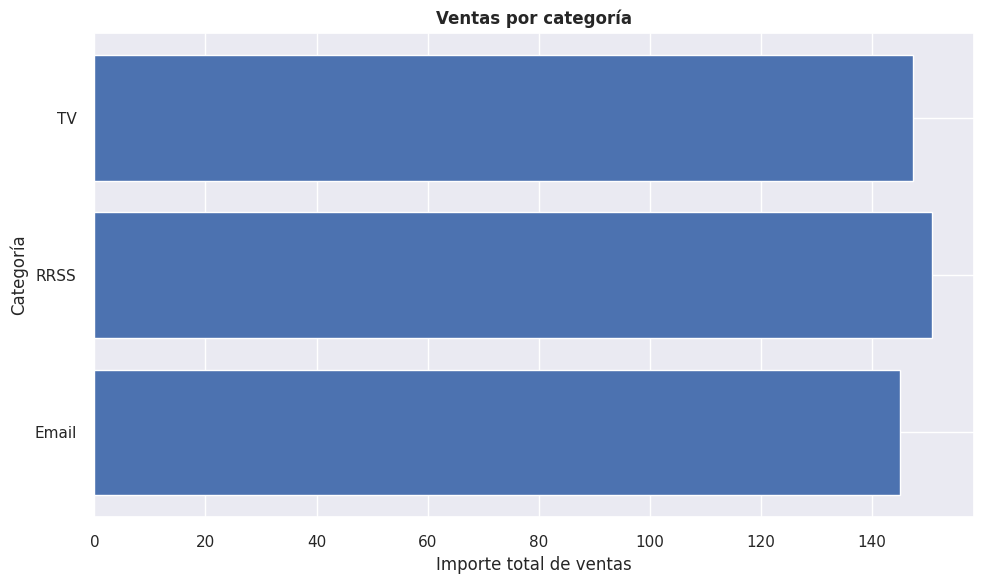

In [282]:
# Histograma costo total por canal
ventas_por_categoria = df_marketing.groupby('canal')['costo'].sum()

plt.figure(figsize=(10, 6))
plt.barh(ventas_por_categoria.index, ventas_por_categoria.values)
plt.title("Ventas por categoría")
plt.xlabel("Importe total de ventas")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

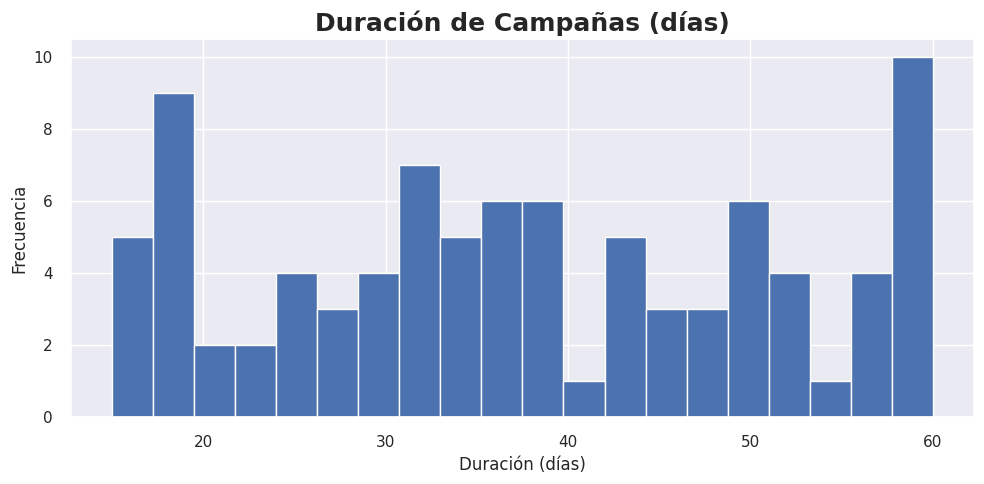

In [283]:
# Histograma duración de la campaña de promoción

df_marketing['duracion'] = (df_marketing['fecha_fin'] - df_marketing['fecha_inicio']).dt.days

plt.figure(figsize=(10,5))
df_marketing['duracion'].plot(kind='hist', bins=20)

# Títulos y etiquetas
plt.title("Duración de Campañas (días)", fontsize=18, weight='bold')
plt.xlabel("Duración (días)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Gráficos Boxplot

###Configuración de estilo global

In [284]:
# Estilo
plt.style.use("seaborn-v0_8")

# Cambiar estilo visual
sns.set_theme(
    style="whitegrid",
    rc={
        "figure.figsize": (10, 6),
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "axes.titleweight": "bold",
        "xtick.labelsize": 12,
        "ytick.labelsize": 12
    }
)


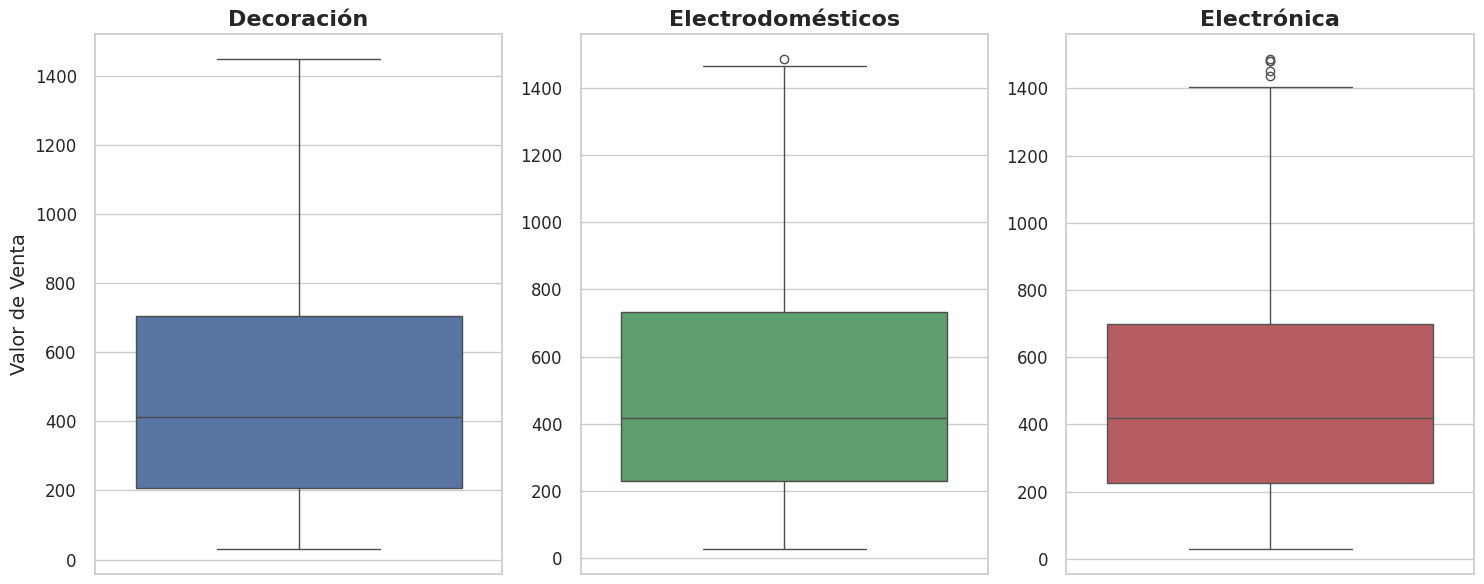

In [285]:
# Boxplot Valor_venta por categoria

plt.figure(figsize=(15, 6))

# --- Subplot 1: Decoración ---
plt.subplot(1, 3, 1)
sns.boxplot(
    data=df_ventas[df_ventas['categoria'] == "Decoración"],
    y="valor_venta",
    color="#4C72B0"   # azul
)
plt.title("Decoración")
plt.ylabel("Valor de Venta")

# --- Subplot 2: Electrodomésticos ---
plt.subplot(1, 3, 2)
sns.boxplot(
    data=df_ventas[df_ventas['categoria'] == "Electrodomésticos"],
    y="valor_venta",
    color="#55A868"   # verde
)
plt.title("Electrodomésticos")
plt.ylabel("")

# --- Subplot 3: Electrónica ---
plt.subplot(1, 3, 3)
sns.boxplot(
    data=df_ventas[df_ventas['categoria'] == "Electrónica"],
    y="valor_venta",
    color="#C44E52"   # rojo
)
plt.title("Electrónica")
plt.ylabel("")

plt.tight_layout()
plt.show()



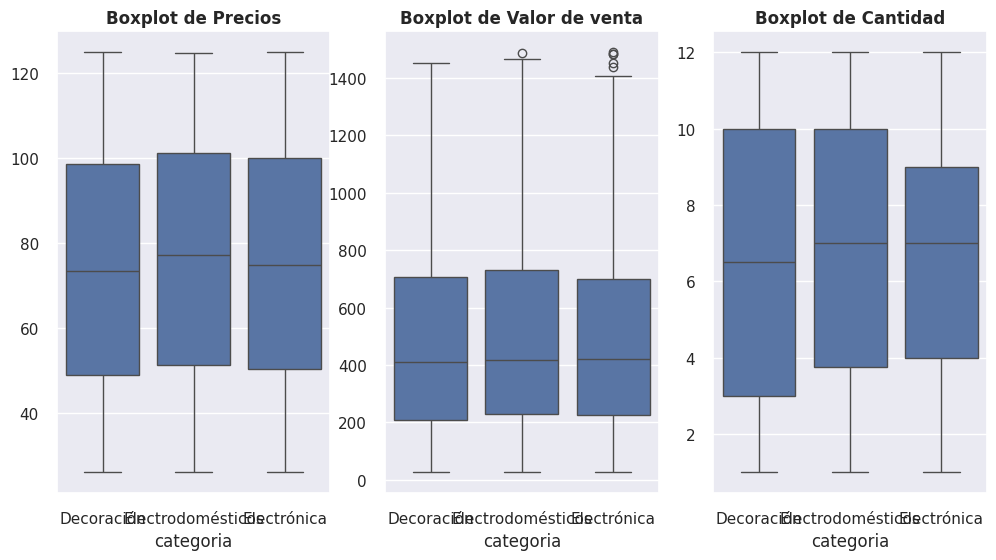

In [286]:
# Boxplot Ventas

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(12, 6)) #ancho x alto = resolucion

# Subplots, dividen al lienzo en partes
plt.subplot(1,3,1) # (1,3,1) => (1 fila, 3 columans, bloque 1)

# Subplot 1
sns.boxplot(data=df_ventas, x="categoria", y="precio")
plt.title("Boxplot de Precios")
plt.ylabel("")

# Subplot 2
plt.subplot(1,3,2) # (1,3,2) => (1 fila, 3 columans, bloque 2)
sns.boxplot(data=df_ventas, x="categoria", y="valor_venta")
plt.title("Boxplot de Valor de venta")
plt.ylabel("")


# Subplot 3
plt.subplot(1,3,3) # (1,3,3) => (1 fila, 3 columans, bloque 3)
sns.boxplot(data=df_ventas, x="categoria", y="cantidad")
plt.title("Boxplot de Cantidad")
plt.ylabel("")

plt.show()

/tmp/ipython-input-2489660314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


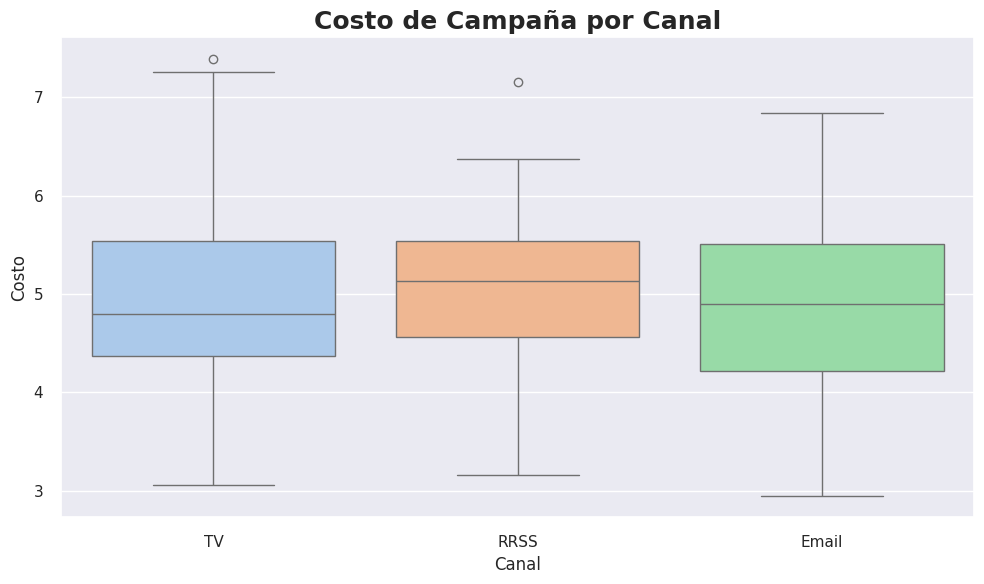

In [287]:
# Boxplot costo de campañas por canal

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_marketing,
    x="canal",
    y="costo",
    palette="pastel"
)
plt.title("Costo de Campaña por Canal", fontsize=18, weight='bold')
plt.xlabel("Canal")
plt.ylabel("Costo")
plt.tight_layout()
plt.show()

## 3 - Correlación

In [288]:
# Primero calculamos la matríz de correlación usando las variables numéricas
corr_ventas = df_ventas[['precio', 'cantidad', 'valor_venta']].corr()
corr_ventas

,precio,cantidad,valor_venta
precio,1.000000,-0.002388,0.558846
cantidad,-0.002388,1.000000,0.773009
valor_venta,0.558846,0.773009,1.000000


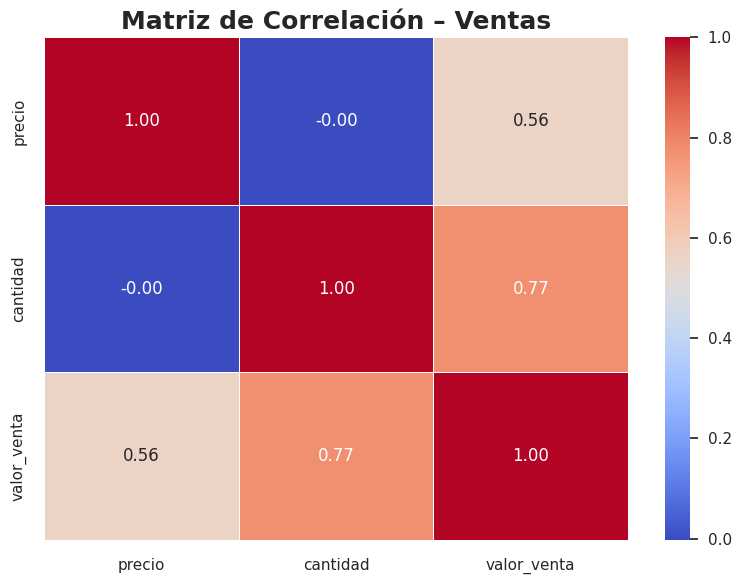

In [289]:
# Heatmap de correlación Ventas

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_ventas,
    annot=True,
    cmap="coolwarm",
    linewidths=.5,
    fmt=".2f"
)
plt.title("Matriz de Correlación – Ventas", fontsize=18, weight="bold")
plt.tight_layout()
plt.show()


In [290]:
# Agregamos una columna
df_marketing['duracion'] = (df_marketing['fecha_fin'] - df_marketing['fecha_inicio']).dt.days

# Primero calculamos la matríz de correlación usando las variables numéricas
corr_marketing = df_marketing[['costo', 'duracion']].corr()
corr_marketing


,costo,duracion
costo,1.000000,0.043757
duracion,0.043757,1.000000


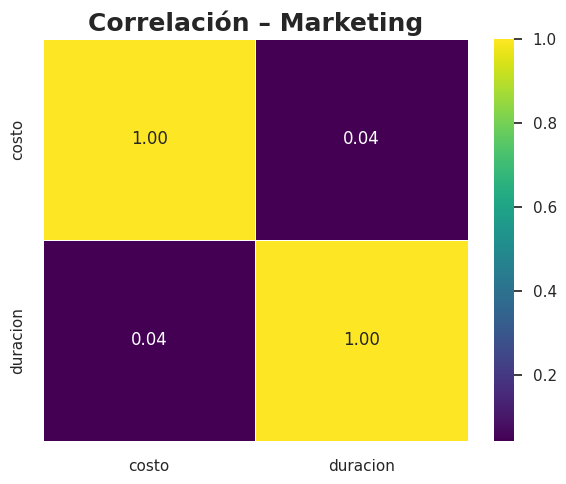

In [291]:
# Heatmap de correlación Marketing

plt.figure(figsize=(6,5))
sns.heatmap(
    corr_marketing,
    annot=True,
    cmap="viridis",
    linewidths=.5,
    fmt=".2f"
)
plt.title("Correlación – Marketing", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

## 4 - Consolidación de datos

Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.

<BR>
Aquí intervienen los KPIs, esto es, cuáles son las métricas que le interesan al negocio.

KPIs:
* Importe total de ventas concretado por mes
* Cantidad de productos totales vendidos por mes
* Volumen de venta por categorías
* Impacto de la campaña de marketing en las ventas

### Importe total de ventas concretado por mes

In [292]:
# Corramos un head para recordar el dataframe
df_ventas.head(10)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84
5,1697,Horno eléctrico,35.35,9,2024-01-02,Electrodomésticos,318.15
6,1710,Plancha de vapor,65.43,2,2024-01-02,Electrodomésticos,130.86
7,2959,Proyector,88.17,9,2024-01-02,Electrónica,793.53
8,318,Rincón de plantas,79.86,11,2024-01-03,Decoración,878.46
9,419,Candelabro,66.11,8,2024-01-03,Decoración,528.88


In [293]:
# Importe total de ventas por mes

df_ventas['mes'] = df_ventas['fecha_venta'].dt.to_period('M')

kpi_importe_mensual = (
    df_ventas.groupby('mes')['valor_venta']
    .sum()
    .reset_index()
    .rename(columns={'valor_venta': 'importe_total_mes'})
)
kpi_importe_mensual.head()


,mes,importe_total_mes
0,2024-01,129604.99
1,2024-02,118672.44
2,2024-03,136779.15
3,2024-04,128430.69
4,2024-05,143727.25


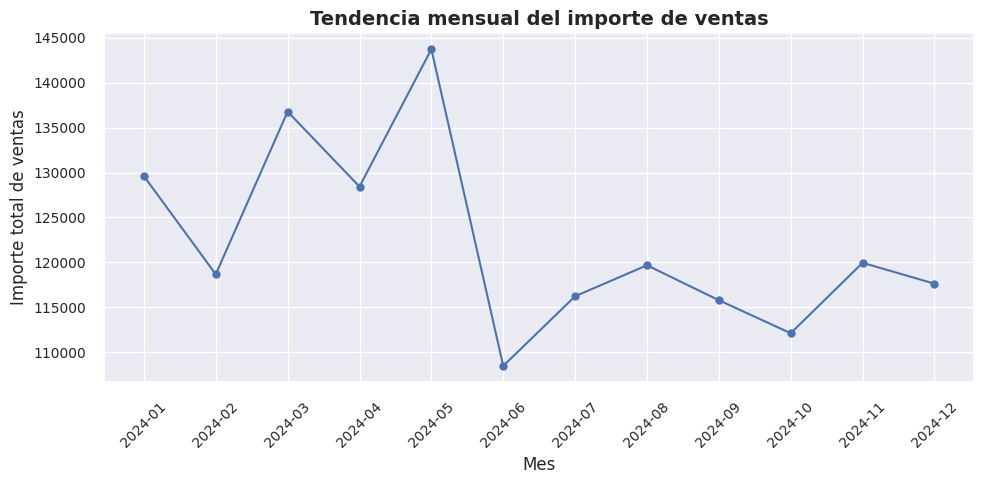

In [294]:
# Creamos columna mes (periodo)
df_ventas['mes'] = df_ventas['fecha_venta'].dt.to_period('M')

# Importe total por mes
importe_mensual = (
    df_ventas
    .groupby('mes')['valor_venta']
    .sum()
    .sort_index()
)


plt.figure(figsize=(10, 5))
plt.plot(importe_mensual.index.astype(str), importe_mensual.values, marker='o')
plt.title("Tendencia mensual del importe de ventas", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Importe total de ventas", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### Cantidad de productos totales vendidos por mes

In [295]:
# Cantidad de productos vendidos por mes

# Generamos primero la columna mes
df_ventas["mes"] = df_ventas["fecha_venta"].dt.month

kpi_cantidad_mensual = (
    df_ventas.groupby('mes')['cantidad']
    .sum()
    .reset_index()
    .rename(columns={'cantidad': 'cantidad_total_mes'})
)
kpi_cantidad_mensual.head()

,mes,cantidad_total_mes
0,1,1741
1,2,1607
2,3,1792
3,4,1715
4,5,1812


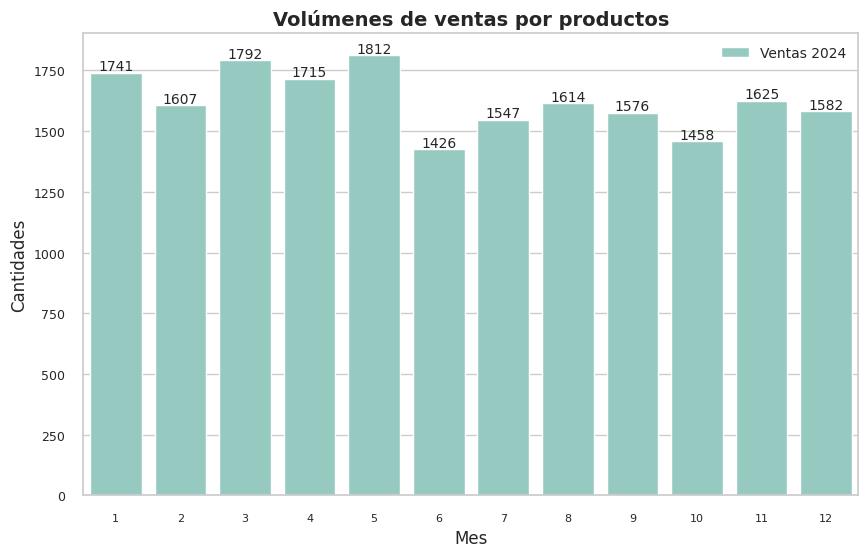

In [296]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos tamaño del lienzo
plt.figure(figsize=(10,6))

# Crear el barplot
ax = sns.barplot(data=kpi_cantidad_mensual, x='mes', y='cantidad_total_mes', label="Ventas 2024", width=0.8)

# Agregar etiquetas arriba de las barras
for i, valor in enumerate(kpi_cantidad_mensual['cantidad_total_mes']):
    ax.text(
        i,                       # posición x de la etiqueta
        valor + 10,                   # posición y (ligeramente arriba de la barra)
        str(valor),              # texto
        ha='center', fontsize=10
    )

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x',  labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por productos', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidades')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

### Volumen de venta por categorías

In [297]:
# Volumen de venta por categoría

kpi_categoria = (
    df_ventas.groupby('categoria')['valor_venta']
    .sum()
    .reset_index()
    .rename(columns={'valor_venta': 'ventas_por_categoria'})
)
kpi_categoria.head()

,categoria,ventas_por_categoria
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


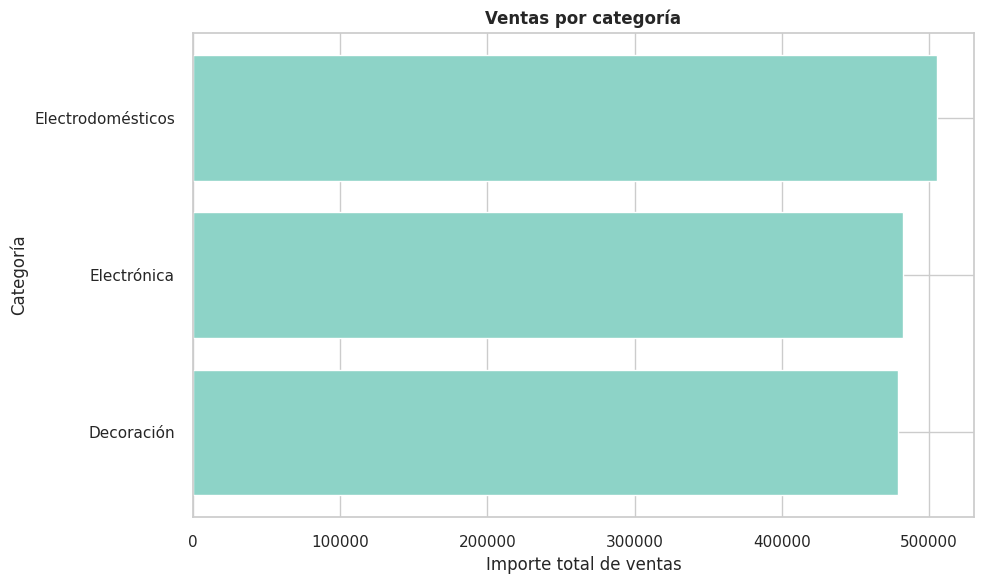

In [298]:
# Barras horizontales

ventas_por_categoria = (
    df_ventas
    .groupby('categoria')['valor_venta']
    .sum()
    .sort_values()
)

plt.figure(figsize=(10, 6))
plt.barh(ventas_por_categoria.index, ventas_por_categoria.values)
plt.title("Ventas por categoría")
plt.xlabel("Importe total de ventas")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

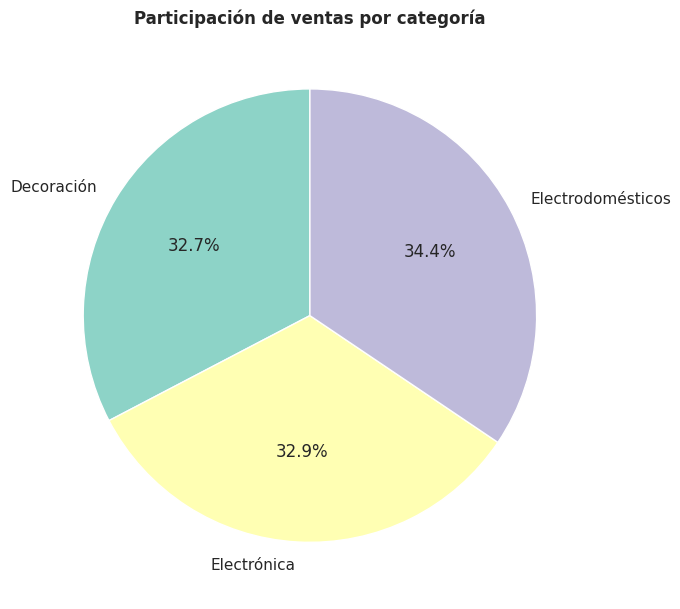

In [299]:
# Visualización en torta para resumen

plt.figure(figsize=(7, 7))
plt.pie(
    ventas_por_categoria.values,
    labels=ventas_por_categoria.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Participación de ventas por categoría")
plt.tight_layout()
plt.show()

### Impacto de la campaña de marketing en las ventas I

Trazamos una linea vertical al primer grafico ventas por mes

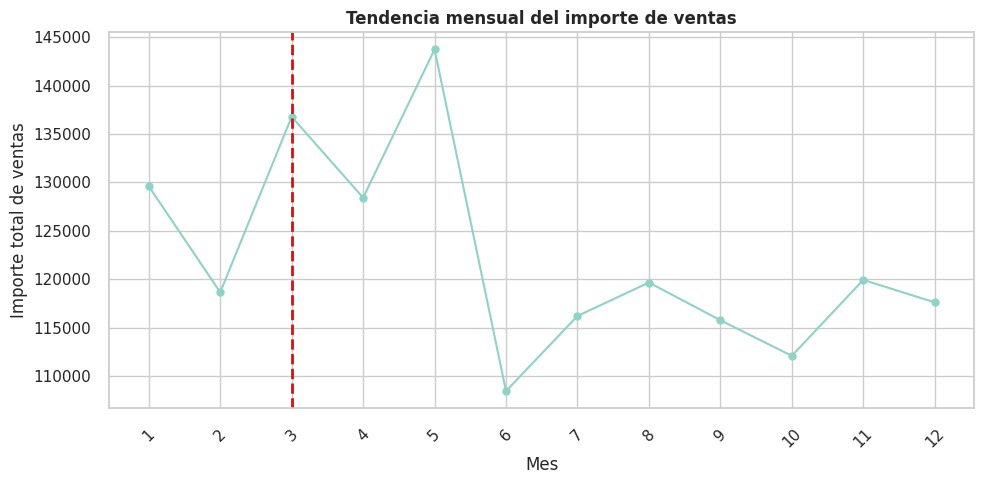

In [300]:
importe_mensual = df_ventas.groupby('mes')['valor_venta'].sum().sort_index()

# Convertimos índice Period -> string para usar en axvline
x = importe_mensual.index.astype(str)

plt.figure(figsize=(10, 5))
plt.plot(x, importe_mensual.values, marker='o')

# --- Línea vertical ---
mes_objetivo = "3"   # <<< CAMBIAR por el mes que quieras
plt.axvline(mes_objetivo, color='red', linestyle='--', linewidth=2)

plt.title("Tendencia mensual del importe de ventas")
plt.xlabel("Mes")
plt.ylabel("Importe total de ventas")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [301]:
# Total de ventas por producto dentro de campaña

ventas_por_producto = (
    ventas_unicas.groupby('producto')['valor_venta']
    .sum()
    .reset_index()
    .rename(columns={'valor_venta': 'ventas_en_campania'})
)
ventas_por_producto.head()

,producto,ventas_en_campania
0,Adorno de pared,15037.90
1,Alfombra,15137.77
2,Aspiradora,12844.78
3,Auriculares,18181.01
4,Batidora,23460.35


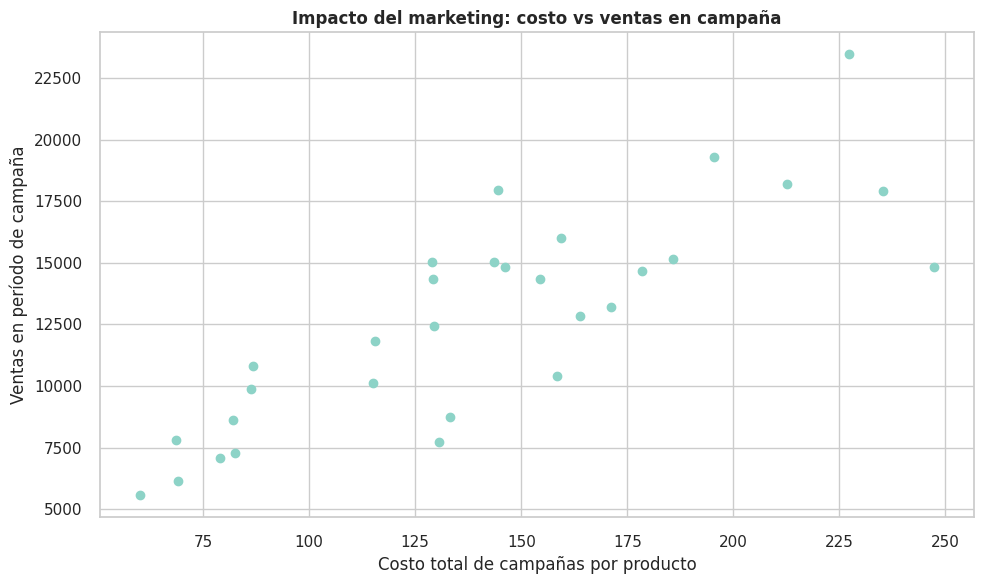

In [302]:
# Costo vs ventas en campaña

plt.figure(figsize=(10, 6))
plt.scatter(
    resultado_final['costo_total'],
    resultado_final['valor_venta']
)
plt.title("Impacto del marketing: costo vs ventas en campaña")
plt.xlabel("Costo total de campañas por producto")
plt.ylabel("Ventas en período de campaña")
plt.grid(True)
plt.tight_layout()
plt.show()


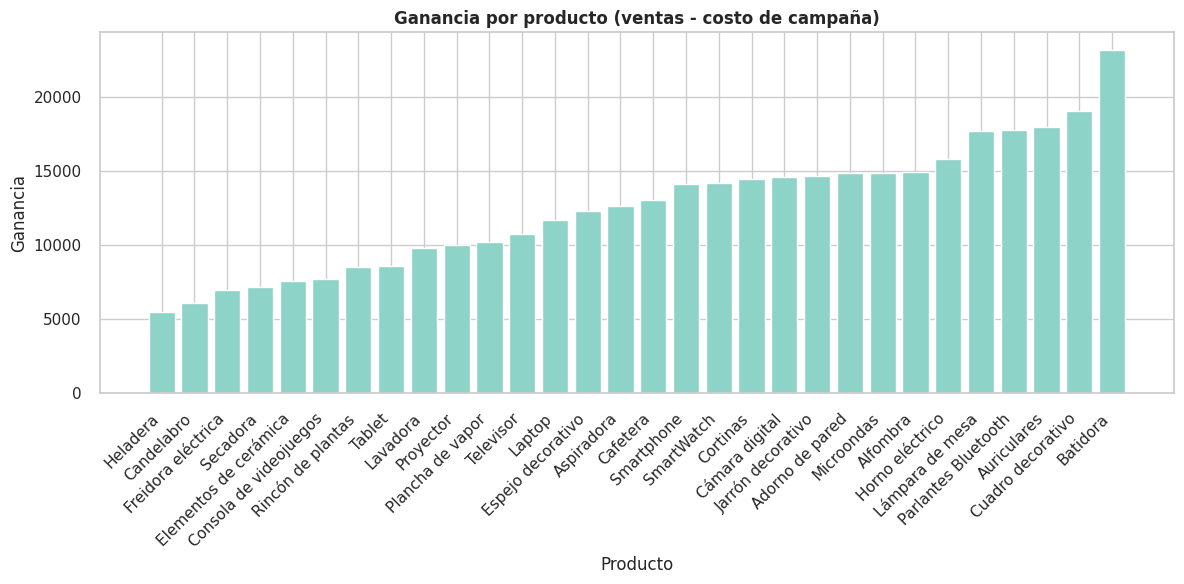

In [303]:
# Ganancia por producto

resultado_ordenado = resultado_final.sort_values('ganancia')

plt.figure(figsize=(12, 6))
plt.bar(resultado_ordenado['producto'], resultado_ordenado['ganancia'])
plt.title("Ganancia por producto (ventas - costo de campaña)")
plt.xlabel("Producto")
plt.ylabel("Ganancia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Heatmap de correlación

In [304]:
# Resumen de ventas por producto (promedios)
resumen_ventas = (
    df_ventas
    .groupby('producto')[['precio', 'cantidad', 'valor_venta']]
    .mean()
    .reset_index()
)

# Duración promedio de campañas por producto
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'])
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'])
df_marketing['duracion'] = (df_marketing['fecha_fin'] - df_marketing['fecha_inicio']).dt.days

duracion_prod = (
    df_marketing
    .groupby('producto')['duracion']
    .mean()
    .reset_index()
    .rename(columns={'duracion': 'duracion_promedio'})
)

# cost_os_por_producto ya lo tenés: ['producto', 'costo_total']

# Unimos todo en un solo dataframe
df_corr = (
    resumen_ventas
    .merge(costos_por_producto, on='producto', how='left')
    .merge(duracion_prod, on='producto', how='left')
)

# Nos quedamos solo con las columnas numéricas que queremos
df_corr_numerico = df_corr[['precio', 'cantidad', 'valor_venta', 'costo_total', 'duracion_promedio']]

corr = df_corr_numerico.corr()
corr


,precio,cantidad,valor_venta,costo_total,duracion_promedio
precio,1.000000,0.089892,0.589566,-0.034638,-0.176515
cantidad,0.089892,1.000000,0.747353,-0.086274,-0.130937
valor_venta,0.589566,0.747353,1.000000,-0.062246,-0.100661
costo_total,-0.034638,-0.086274,-0.062246,1.000000,0.243674
duracion_promedio,-0.176515,-0.130937,-0.100661,0.243674,1.000000


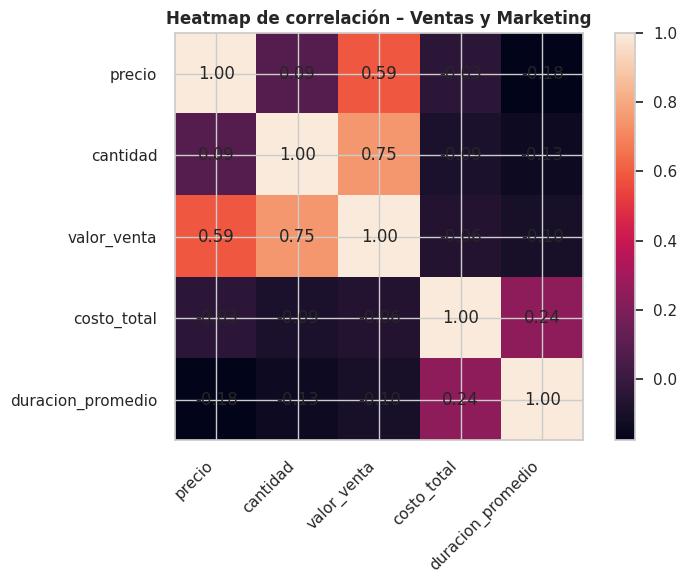

In [305]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation='nearest')
plt.title("Heatmap de correlación – Ventas y Marketing")
plt.colorbar()

ticks = range(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=45, ha='right')
plt.yticks(ticks, corr.columns)

# Anotar los valores numéricos en cada celda
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        valor = corr.iloc[i, j]
        plt.text(j, i, f"{valor:.2f}", ha='center', va='center')

plt.tight_layout()
plt.show()

### Impacto de la campaña de marketing en las ventas II

Revisar la sección Etaoa 2 - Integración de datos
Allí, luego de unir los dataframes df_ventas con df_marketing, se generan 2 dataframes independientes, cada uno conteniendo las ventas que se hicieron dentro de algún período de marketing, y otro con las ventas que se realizaron fuera de camapaña.
<BR>
Así surgen:
* ventas_con_marketing_final
* ventas_sin_marketing_final

#### Identificar ventas que cayeron dentro de campañas

#### Costos totales por producto (sumando canales TV+RRSS+Email)

#### Unir ventas + marketing

## 4 - Presentación Final